Primeiro, vamos começar instalando as bibliotecas e chamando o arquivo. Iremos trabalhar com o arquivo ALL F1 RACES, que inclui dados de todas as corridas até 2019. 
Em seguida, vamos analisar os dados para saber do que se trata.

In [391]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("C:\\Users\\Marina\\Documents\\Desafio_files\\09_F1\\All_F1_Races.xlsx")
all_f1_races = df

A partir dessa primeira análise, observamos que podemos dividir as variáveis em três grupos:
* Grupo 1 - Corrida
Temporada, rodada, circuito, data da corrida.
* Grupo 2 - Piloto/Construtora
Nome do piloto, nome da construtora, nacionalidades, data de nascimento, número do carro.
* Grupo 3 - Resultado
Posição de largada, posição de chegada, voltas, situação final. 

Vamos começar o tratamento da base analisando a quantidade de valores vazios (is null).

In [392]:
#Quantidade de valores vazios
print(all_f1_races.isnull().sum().sort_values(ascending=0))

#Percentual de valores vazios na coluna 'Circ Count'
print("Percentual de valores vazios em Circ Count: " + "{:.0%}".format(all_f1_races['Circ Count'].isnull().sum() / len(all_f1_races.index)))


Circ Count        23596
number                6
dateOfBirth           1
season                0
familyName            0
results.status        0
results.laps          0
results.grid          0
nationality.1         0
name                  0
constructorId         0
nationality           0
givenName             0
round                 0
driverId              0
points                0
positionText          0
position              0
circuitName           0
circuitId             0
date                  0
raceName              0
Full Name             0
dtype: int64
Percentual de valores vazios em Circ Count: 96%


Vemos que temos 96% dos casos vazios na coluna Circ Count. Por isso, essa coluna será retirada da análise. 
As outras colunas vazias são number e dateOfBirth. 
Number representa o número do carro, e apesar de ser numérica, ela é categórica, e não contínua. Por isso, não faz sentido preencher com algum cálculo. 
Para DateOfBirth, iremos analisar se temos a data de aniversário do piloto em questão para preenchermos.

In [393]:
all_f1_races[(all_f1_races['dateOfBirth']).isnull()]
all_f1_races[(all_f1_races['Full Name']) == 'Ray Reed']

# According to its Wikipedia page, Ray Reed date of birth was April 30th 1932. Therefore, we will fill in this value to his DOB.

all_f1_races.loc[all_f1_races['Full Name'] == 'Ray Reed', 'dateOfBirth'] = '1932-04-30'
all_f1_races[all_f1_races['Full Name']=='Ray Reed']

,season,round,raceName,date,circuitId,circuitName,number,position,positionText,points,...,dateOfBirth,nationality,constructorId,name,nationality.1,results.grid,results.laps,results.status,Circ Count,Full Name
3160,1965,1,South African Grand Prix,1965-01-01,george,Prince George Circuit,26.0,29,W,0.0,...,1932-04-30,South African,re,RE,Rhodesian,0,0,Withdrew,NaN,Ray Reed


Retornando a análise de valores vazios, agora temos apenas Circ Count e number com valores vazios. 
Não iremos mexer nesses casos.

In [394]:
print(all_f1_races.isnull().sum().sort_values(ascending=0))

Circ Count        23596
number                6
season                0
familyName            0
results.status        0
results.laps          0
results.grid          0
nationality.1         0
name                  0
constructorId         0
nationality           0
dateOfBirth           0
givenName             0
round                 0
driverId              0
points                0
positionText          0
position              0
circuitName           0
circuitId             0
date                  0
raceName              0
Full Name             0
dtype: int64


Para o tratamento da base, iremos deixar os campos ID, que são menores, e as informações mais completas serão exportadas em tabelas adicionais. 
Essas serão:
* Tabela dimCONSTRUCTOR
* Tabela dimRACE
* Tabela dimPILOT

Mas antes, iremos renomear as colunas para melhor entendimento e retirar a coluna Circ Count.

In [395]:
# Renomeando as colunas
all_f1_races.rename(columns = {'circuitId' : 'circuit.ID'
                               , 'number' : 'number_car'
                               , 'position': 'position.final'
                               , 'positionText': 'position.final.TxT'
                               , 'points' : 'points.earned'
                               , 'driverId' : 'driver.ID'
                               , 'nationality' : 'nationality.pilot'
                               , 'constructorId' : 'constructor.ID'
                               , 'name' : 'name.constructor'
                               , 'nationality.1' : 'nationality.constructor'
                               , 'results.grid':'position.start'
                               , 'results.laps' : 'laps.done'
                               , 'results.status' : 'status.final'
                               , 'Full Name' : 'name.pilot'
                               }, inplace = True)

# Removendo a Circ Count
my_cols = set(all_f1_races.columns)
my_cols.remove('Circ Count')
my_cols = list(my_cols)
df = all_f1_races[my_cols]
all_f1_races = df

In [396]:
dimRACE = all_f1_races.loc[:,['circuitName', 'raceName', 'round', 'season', 'date']]
dimRACE = dimRACE.reindex(columns=['date', 'season', 'round', 'raceName', 'circuitName'])

dimCONSTRUCTOR = all_f1_races.loc[:,['constructor.ID', 'nationality.constructor', 'name.constructor']]
dimCONSTRUCTOR = dimCONSTRUCTOR.reindex(columns=['constructor.ID', 'name.constructor', 'nationality.constructor'])

dimPILOT = all_f1_races.loc[:, ['givenName', 'name.pilot', 'nationality.pilot','driver.ID', 'number_car', 'dateOfBirth', 'familyName']]
dimPILOT = dimPILOT.reindex(columns=['driver.ID', 'name.pilot', 'givenName', 'familyName', 'nationality.pilot', 'dateOfBirth', 'number_car'])



In [397]:
# Removendo colunas que não são necessárias 
my_cols = set(all_f1_races.columns)
my_cols.remove('nationality.constructor')
my_cols.remove('circuitName')
my_cols.remove('givenName')
my_cols.remove('name.pilot')
my_cols.remove('nationality.pilot')
my_cols.remove('raceName')
my_cols.remove('round')
my_cols.remove('circuit.ID')
my_cols.remove('number_car')
my_cols.remove('dateOfBirth')
my_cols.remove('familyName')
my_cols.remove('name.constructor')
my_cols = list(my_cols)
df = all_f1_races[my_cols]


# Reordenando as colunas
df = df.reindex(columns=['date'
                         , 'season'
                         , 'driver.ID'
                         , 'constructor.ID'
                         , 'position.start'
                         , 'position.final'
                         , 'position.final.TxT'
                         , 'status.final'
                         , 'laps.done'
                         , 'points.earned'])

df['Vitória'] = np.where(df['position.final']== 1, 1, 0)
all_treated = df

df

,date,season,driver.ID,constructor.ID,position.start,position.final,position.final.TxT,status.final,laps.done,points.earned,Vitória
0,1950-05-13,1950,farina,alfa,1,1,1,Finished,70,9.0,1
1,1950-05-13,1950,fagioli,alfa,2,2,2,Finished,70,6.0,0
2,1950-05-13,1950,reg_parnell,alfa,4,3,3,Finished,70,4.0,0
3,1950-05-13,1950,cabantous,lago,6,4,4,+2 Laps,68,3.0,0
4,1950-05-13,1950,rosier,lago,9,5,5,+2 Laps,68,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...
24612,2019-12-01,2019,giovinazzi,alfa,16,16,16,+1 Lap,54,0.0,0
24613,2019-12-01,2019,russell,williams,18,17,17,+1 Lap,54,0.0,0
24614,2019-12-01,2019,gasly,toro_rosso,11,18,18,+2 Laps,53,0.0,0
24615,2019-12-01,2019,kubica,williams,19,19,19,+2 Laps,53,0.0,0


Aqui, fizemos alguns levantamentos para analisar a base

* 01: Quem são os pilotos com mais vitórias na história?

In [398]:
maispontuaram = all_treated
maispontuaram = maispontuaram.groupby('driver.ID').sum({'points.earned', 'laps.done', 'Vitória'}).sort_values('Vitória',ascending=False)
maispontuaram.head(10)

,season,position.start,position.final,laps.done,points.earned,Vitória
driver.ID,,,,,,
michael_schumacher,616393,1499,2119,16824,1566.0,91
hamilton,503306,963,1246,14216,3431.0,84
vettel,485243,1177,1438,13148,2985.0,53
prost,401209,836,1516,10540,798.5,51
senna,322158,507,1338,8236,614.0,41
alonso,631199,2669,2584,16778,1899.0,32
mansell,381452,1205,2159,8750,482.0,31
stewart,196932,450,741,5225,360.0,27
clark,141394,262,506,3930,274.0,25


* 02: Sair na pole position significa ganhar a corrida? Ou estar no pódio?

Casos que não ganharam representam 58.7% (603 casos)
Casos que ganharam representam 41.3% (425 casos)


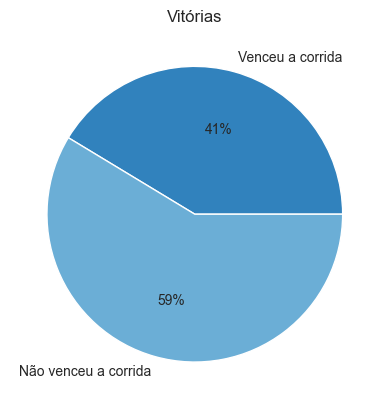

In [399]:
#os casos onde position.largada = 0 significam que o piloto não largou no grid, então não irão interfirir no resultado
pole = len((all_treated[(all_treated['position.start'] == 1)]).index)

#Significa ganhar a corrida?
pole_naoganhou = all_treated[(all_treated['position.final'] > 1) & (all_treated['position.start'] == 1)]
pole_naoganhou = len(pole_naoganhou.index) 
pole_naoganhou_percent = pole_naoganhou / pole

pole_ganhou = all_treated[(all_treated['position.final'] == 1) & (all_treated['position.start'] == 1)]
pole_ganhou = len(pole_ganhou.index) 
pole_ganhou_percent = pole_ganhou / pole

print ("Casos que não ganharam representam "  +  "{:.1%}".format(pole_naoganhou_percent)  + " (" +str(pole_naoganhou) + " casos)" )
print ("Casos que ganharam representam "  +  "{:.1%}".format(pole_ganhou_percent) + " (" +str(pole_ganhou) + " casos)" )

data1 = [pole_ganhou, pole_naoganhou]
colors = sns.color_palette('tab20c')[0:5]
plt.pie(data1, labels = ['Venceu a corrida', 'Não venceu a corrida'], colors = colors, autopct='%.0f%%')
plt.title('Vitórias')
plt.show()

Casos que estiveram no pódio representam 62.1% (638 casos)
Casos que não estiveram no pódio representam 37.9% (390 casos)


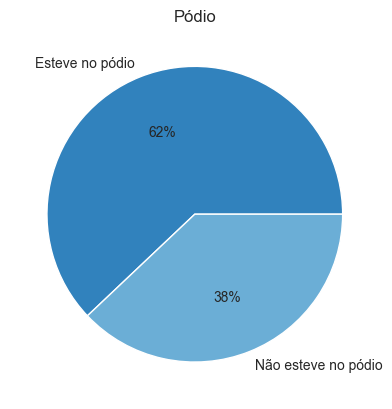

In [400]:
#Signinfica estar no pódio?
pole_podio = all_treated[(all_treated['position.final'] < 4) & (all_treated['position.start'] == 1)]
pole_podio = len(pole_podio.index) 
pole_podio_percent = pole_podio / pole

pole_naopodio = all_treated[(all_treated['position.final'] > 3) & (all_treated['position.start'] == 1)]
pole_naopodio = len(pole_naopodio.index) 
pole_naopodio_percent = pole_naopodio / pole

print ("Casos que estiveram no pódio representam "  +  "{:.1%}".format(pole_podio_percent) + " (" +str(pole_podio) + " casos)" )
print ("Casos que não estiveram no pódio representam "  +  "{:.1%}".format(pole_naopodio_percent)  + " (" +str(pole_naopodio) + " casos)" )

data2 = [pole_podio, pole_naopodio]
colors = sns.color_palette('tab20c')[0:9]
plt.pie(data2, labels = ['Esteve no pódio', 'Não esteve no pódio'], colors = colors, autopct='%.0f%%')
plt.title('Pódio')
plt.show()

* 03: Esse resultado é diferente para os três principais pontuadores (Schumacher, Hamilton e Vettel)?

Casos que não ganharam representam 43.2% (92 casos)
Casos que ganharam representam 56.8% (121 casos)


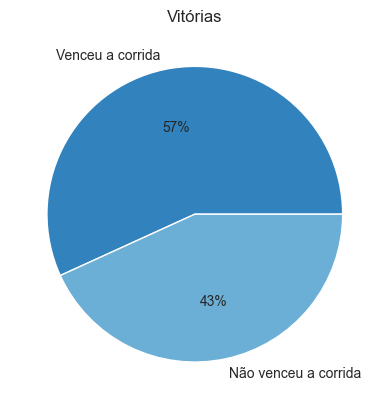

In [414]:
pole_primeiros = all_treated[(all_treated['position.start'] == 1)] 
pole_primeiros = pole_primeiros[(pole_primeiros['driver.ID'] == 'michael_schumacher') 
                                | (pole_primeiros['driver.ID'] == 'hamilton') 
                                | (pole_primeiros['driver.ID'] == 'vettel')]


pole_naoganhou2 = pole_primeiros[(pole_primeiros['position.final'] > 1) & (pole_primeiros['position.start'] == 1)]
pole_naoganhou2 = len(pole_naoganhou2.index) 
pole_primeiros_len = len(pole_primeiros)
pole_naoganhou2_percent = pole_naoganhou2 / pole_primeiros_len

pole_ganhou2 = pole_primeiros[(pole_primeiros['position.final'] == 1) & (pole_primeiros['position.start'] == 1)]
pole_ganhou2 = len(pole_ganhou2.index) 
pole_ganhou2_percent = pole_ganhou2 / pole_primeiros_len


print ("Casos que não ganharam representam "  +  "{:.1%}".format(pole_naoganhou2_percent)  + " (" +str(pole_naoganhou2) + " casos)" )
print ("Casos que ganharam representam "  +  "{:.1%}".format(pole_ganhou2_percent) + " (" +str(pole_ganhou2) + " casos)" )

data1 = [pole_ganhou2, pole_naoganhou2]
colors = sns.color_palette('tab20c')[0:5]
plt.pie(data1, labels = ['Venceu a corrida', 'Não venceu a corrida'], colors = colors, autopct='%.0f%%')
plt.title('Vitórias')
plt.show()


Casos que estiveram no pódio representam 80.3% (171 casos)
Casos que não estiveram no pódio representam 19.7% (42 casos)


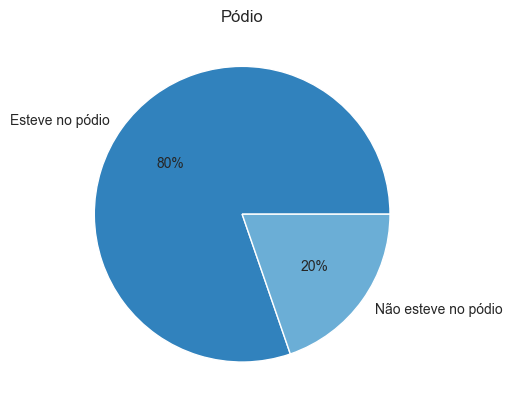

In [416]:
pole_podio2 = pole_primeiros[(pole_primeiros['position.final'] < 4)]
pole_podio2 = len(pole_podio2.index) 
pole_podio2_percent = pole_podio2 / pole_primeiros_len

pole_naopodio2 = pole_primeiros[(pole_primeiros['position.final'] > 3)]
pole_naopodio2 = len(pole_naopodio2.index) 
pole_naopodio2_percent = pole_naopodio2 / pole_primeiros_len

print ("Casos que estiveram no pódio representam "  +  "{:.1%}".format(pole_podio2_percent) + " (" +str(pole_podio2) + " casos)" )
print ("Casos que não estiveram no pódio representam "  +  "{:.1%}".format(pole_naopodio2_percent)  + " (" +str(pole_naopodio2) + " casos)" )

data2 = [pole_podio2, pole_naopodio2]
colors = sns.color_palette('tab20c')[0:9]
plt.pie(data2, labels = ['Esteve no pódio', 'Não esteve no pódio'], colors = colors, autopct='%.0f%%')
plt.title('Pódio')
plt.show()

* 04: Quais pilotos ganharam uma temporada fazendo mais pontos e menos pontos? 

In [417]:
dimCONSTRUCTOR.columns

list2 = dimCONSTRUCTOR
my_cols = set(list2.columns)
my_cols.remove('constructor.ID')
my_cols.remove('nationality.constructor')
my_cols = list(my_cols)
df = list2[my_cols]

df2 = set(df)
without_duplicates = list(dict.fromkeys(df))
without_duplicates

print("UNDER CONSTRUCTION")



['name.constructor']